# ***CNN MODEL FOR CLASSIFICATION OF FLOWERS*** 



### 1.   ***DOWNLOAD THE DATA SET***




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd/content/drive/MyDrive


/content/drive/MyDrive


In [ ]:
!unzip '/content/drive/MyDrive/IBM_PROJECT/Flowers-Dataset.zip'


Archive:  /content/drive/MyDrive/IBM_PROJECT/Flowers-Dataset.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 




### 2.   ***IMAGE AUGMENTATION***



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)


In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)


In [ ]:
pip install split-folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders


In [ ]:
input_folder='/content/drive/MyDrive/flowers'


In [ ]:
splitfolders.ratio(input_folder,output='/content/drive/MyDrive/flowersdataset',ratio=(.8,0,.2),group_prefix=None)



Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  8.66 files/s]
Copying files: 9 files [00:00, 16.62 files/s]
Copying files: 23 files [00:00, 41.67 files/s]
Copying files: 36 files [00:00, 61.05 files/s]
Copying files: 48 files [00:00, 74.60 files/s]
Copying files: 60 files [00:00, 85.29 files/s]
Copying files: 72 files [00:01, 93.39 files/s]
Copying files: 85 files [00:01, 101.10 files/s]
Copying files: 100 files [00:01, 107.81 files/s]
Copying files: 115 files [00:01, 114.39 files/s]
Copying files: 130 files [00:01, 117.66 files/s]
Copying files: 144 files [00:01, 123.52 files/s]
Copying files: 157 files [00:01, 123.71 files/s]
Copying files: 170 files [00:01, 122.93 files/s]
Copying files: 183 files [00:01, 122.77 files/s]
Copying files: 196 files [00:02, 120.56 files/s]
Copying files: 209 files [00:02, 120.10 files/s]
Copying files: 222 files [00:02, 120.53 files/s]
Copying files: 236 files [00:02, 121.31 files/s]
Copying files: 251 files [00:02, 121.86 fil

In [ ]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/flowersdataset/train",target_size=(64,64),class_mode='categorical',batch_size=24)


Found 3452 images belonging to 5 classes.


In [ ]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/flowersdataset/test",target_size=(64,64),class_mode='categorical',batch_size=24)


Found 865 images belonging to 5 classes.


In [ ]:
x_train.class_indices


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}



### 3.   ***CREATE MODEL***



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [ ]:
model=Sequential()





### 4.   ***ADD LAYERS(CONVOLUTION, MAX POOLING, FLATTEN, DENSE, HIDDEN, OUTPUT LAYERS)***



In [ ]:
#Adding Convolutional Layer
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [ ]:
#Adding Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#Flatten Layer
model.add(Flatten())

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Hidden Layers
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [ ]:
#Output Layer
model.add(Dense(5,activation='softmax'))




### 5.   **COMPILE THE MODEL** 



In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
len(x_train)


144


### 6.   ***FIT THE MODEL***



In [ ]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


144/144 [==============================] - 18s 126ms/step - loss: 0.7712 - accuracy: 0.7086 - val_loss: 0.9611 - val_accuracy: 0.6277
Epoch 2/10
144/144 [==============================] - 18s 127ms/step - loss: 0.7241 - accuracy: 0.7219 - val_loss: 1.0017 - val_accuracy: 0.6358
Epoch 3/10
144/144 [==============================] - 18s 127ms/step - loss: 0.6713 - accuracy: 0.7390 - val_loss: 0.9800 - val_accuracy: 0.6566
Epoch 4/10
144/144 [==============================] - 18s 126ms/step - loss: 0.6496 - accuracy: 0.7584 - val_loss: 0.9857 - val_accuracy: 0.6347
Epoch 5/10
144/144 [==============================] - 18s 126ms/step - loss: 0.5961 - accuracy: 0.7758 - val_loss: 1.3042 - val_accuracy: 0.5977
Epoch 6/10
144/144 [==============================] - 19s 134ms/step - loss: 0.5691 - accuracy: 0.7848 - val_loss: 1.1743 - val_accuracy: 0.6486
Epoch 7/10
144/144 [==============================] - 18s 125ms/step - loss: 0.5266 - accuracy: 0.8065 - val_loss: 1.0406 - val_accuracy: 0.6

### 7.   *** SAVE THE MODEL***



In [ ]:
model.save('flowers.h5')



### 8.   *** TEST THE MODEL***



In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

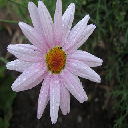

In [ ]:
#img = image.load_img(r"/content/drive/MyDrive/cnn/flowers/rose/10503217854_e66a804309.jpg")
img=image.load_img(r"/content/drive/MyDrive/flowersdataset/test/daisy/3706420943_66f3214862_n.jpg",target_size=(128,128))
img

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/flowersdataset/test/daisy/3706420943_66f3214862_n.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
x_train.class_indices
index=['daisy','dandellion','rose','sunflower','tulip']
index[y[0]]

'daisy'

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

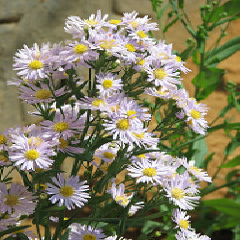

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/flowersdataset/test/daisy/99306615_739eb94b9e_m.jpg",target_size=(240,240))
img

#Array **Conversion**

In [ ]:
x = image.img_to_array(img)
x

array([[[128., 123.,  94.],
        [131., 126.,  97.],
        [131., 126.,  97.],
        ...,
        [ 46.,  77.,  17.],
        [ 46.,  77.,  17.],
        [ 46.,  75.,  17.]],

       [[124., 119.,  89.],
        [128., 123.,  94.],
        [128., 123.,  94.],
        ...,
        [ 44.,  73.,  15.],
        [ 44.,  73.,  15.],
        [ 43.,  70.,  17.]],

       [[119., 116.,  85.],
        [125., 121.,  92.],
        [125., 121.,  92.],
        ...,
        [ 43.,  70.,  17.],
        [ 43.,  70.,  17.],
        [ 43.,  67.,  19.]],

       ...,

       [[ 49.,  56.,  14.],
        [119., 112.,  58.],
        [119., 112.,  58.],
        ...,
        [ 94., 131.,  62.],
        [ 94., 131.,  62.],
        [ 79., 121.,  37.]],

       [[ 88.,  86.,  38.],
        [126., 114.,  66.],
        [126., 114.,  66.],
        ...,
        [ 91., 125.,  64.],
        [ 91., 125.,  64.],
        [ 82., 120.,  45.]],

       [[110.,  97.,  63.],
        [121., 105.,  79.],
        [121., 1

In [ ]:
x = np.expand_dims(x,axis=0)
x

array([[[[128., 123.,  94.],
         [131., 126.,  97.],
         [131., 126.,  97.],
         ...,
         [ 46.,  77.,  17.],
         [ 46.,  77.,  17.],
         [ 46.,  75.,  17.]],

        [[124., 119.,  89.],
         [128., 123.,  94.],
         [128., 123.,  94.],
         ...,
         [ 44.,  73.,  15.],
         [ 44.,  73.,  15.],
         [ 43.,  70.,  17.]],

        [[119., 116.,  85.],
         [125., 121.,  92.],
         [125., 121.,  92.],
         ...,
         [ 43.,  70.,  17.],
         [ 43.,  70.,  17.],
         [ 43.,  67.,  19.]],

        ...,

        [[ 49.,  56.,  14.],
         [119., 112.,  58.],
         [119., 112.,  58.],
         ...,
         [ 94., 131.,  62.],
         [ 94., 131.,  62.],
         [ 79., 121.,  37.]],

        [[ 88.,  86.,  38.],
         [126., 114.,  66.],
         [126., 114.,  66.],
         ...,
         [ 91., 125.,  64.],
         [ 91., 125.,  64.],
         [ 82., 120.,  45.]],

        [[110.,  97.,  63.],
       

**PREDICTION**

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


early_stopping = EarlyStopping(monitor='val_accuracy',
                        patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                        patience=5,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]

In [ ]:

model.fit_generator(x_train,
                    steps_per_epoch=len(x_train),
                    epochs=10,
                    callbacks=callback,
                    validation_data=x_test,
                    validation_steps=len(x_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


144/144 [==============================] - 18s 124ms/step - loss: 0.3998 - accuracy: 0.8546 - val_loss: 1.1986 - val_accuracy: 0.6474 - lr: 0.0010
Epoch 2/10
144/144 [==============================] - 18s 124ms/step - loss: 0.3423 - accuracy: 0.8743 - val_loss: 1.2779 - val_accuracy: 0.6520 - lr: 0.0010
Epoch 3/10
144/144 [==============================] - 18s 123ms/step - loss: 0.3601 - accuracy: 0.8746 - val_loss: 1.3240 - val_accuracy: 0.6751 - lr: 0.0010
Epoch 4/10
144/144 [==============================] - 18s 124ms/step - loss: 0.3210 - accuracy: 0.8833 - val_loss: 1.3387 - val_accuracy: 0.6543 - lr: 0.0010
Epoch 5/10
144/144 [==============================] - 18s 124ms/step - loss: 0.2878 - accuracy: 0.9009 - val_loss: 1.6106 - val_accuracy: 0.6046 - lr: 0.0010
Epoch 6/10
144/144 [==============================] - 18s 124ms/step - loss: 0.2683 - accuracy: 0.9047 - val_loss: 1.3772 - val_accuracy: 0.6647 - lr: 0.0010
Epoch 7/10
144/144 [==============================] - 18s 125ms

In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
img=image.load_img(r"/content/drive/MyDrive/flowersdataset/test/daisy/3706420943_66f3214862_n.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
x_train.class_indices
index=['daisy','dandellion','rose','sunflower','tulip']
index[y[0]]

'daisy'

In [ ]:
op = ['daisy','dandelion','rose','sunflower','tulip']
pred = np.argmax(model.predict(x))
op[pred]

'daisy'